# Q1. Text Classification, Loading and Pre-proccesing the Quora Dataset(2L).

In [1]:
import numpy as np #importing NumPy library as because we have to do many calculations here moreover mathematical operations
import pandas as pd #importing pandas for data manipulations.
import re #importing the regular expression library for the strings verifications
import nltk #importing NLTK to perform toekinzing,pos-tagging,stemming etc 
import spacy #importing spacy to perform nlp
import string #importing string library for string manipulation.

#1st step is to load the csv quoara dataset into a dataframe df
# As told here we will choose 2lakhs data from the given dataset

df= pd.read_csv('C:/AI2/quora_questions.csv',sep= "\t",nrows=200000)
df.head(6) #checking  top 6  values of our dataset 


,question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."
5,Astrology: I am a Capricorn Sun Cap moon and c...


In [2]:
#Now i am going to convert the texts into lower case 
#and store it into a new column Text_lower
#lowering the texts makes it easy for us to differentiate as because python treats 'A' and 'a' differently
df['text_low_case']  = df['question'].str.lower()


In [3]:
#checking weather the texts are coverted into lowercase
df['text_low_case'].head(5)

0    what is the step by step guide to invest in sh...
1    what is the story of kohinoor (koh-i-noor) dia...
2    how can i increase the speed of my internet co...
3    why am i mentally very lonely? how can i solve...
4    which one dissolve in water quikly sugar, salt...
Name: text_low_case, dtype: object

In [4]:
#removing the punctuations and adding the new data to the "text_punct"
df['text_punct'] = df['question'].str.replace('[^\w\s]','')
df['text_punct'].head()

0    What is the step by step guide to invest in sh...
1       What is the story of Kohinoor KohiNoor Diamond
2    How can I increase the speed of my internet co...
3     Why am I mentally very lonely How can I solve it
4    Which one dissolve in water quikly sugar salt ...
Name: text_punct, dtype: object

In [5]:
#REmoving the stop words which are not really needed and which give less information
#Doing this helps us to focus more on the important words

#importing the stopwords library to remove the stopwords from our dataset
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

In [6]:
#below is the function defined for removing the stopwords
def stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [7]:
#here we are assigning the stopword fucntion onto the 'Text_stop' and storing it in 'text_stop'
df["text_stop"] = df["text_punct"].apply(stopwords)
df["text_stop"].head()

0       What step step guide invest share market india
1                 What story Kohinoor KohiNoor Diamond
2    How I increase speed internet connection using...
3                    Why I mentally lonely How I solve
4    Which one dissolve water quikly sugar salt met...
Name: text_stop, dtype: object

In [8]:
#now tokenizing our dataset 

In [9]:
#defining the function for tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

In [10]:
#applying the function to the'text_stop' and storing it in the new column 'text_token'
df['text_token'] = df['text_stop'].apply(lambda x: tokenization(x.lower()))
df[['text_token']].head(5)#verifying the top 5 values

,text_token
0,"[what, step, step, guide, invest, share, marke..."
1,"[what, story, kohinoor, kohinoor, diamond]"
2,"[how, i, increase, speed, internet, connection..."
3,"[why, i, mentally, lonely, how, i, solve]"
4,"[which, one, dissolve, water, quikly, sugar, s..."


In [11]:
#importing wordnet and wordnetlemmatizer to perform lemmatizing
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV} # Pos tag, used Noun, Verb, Adjective and Adverb

In [12]:
#defining the function for lemmatization
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [13]:
#calling the defined function on the 'text_stop' and storing it in new column named 'text_lemma'
df["text_lemma"] = df["text_stop"].apply(lemmatize_words)

In [14]:
df[['text_lemma']]

,text_lemma
0,What step step guide invest share market india
1,What story Kohinoor KohiNoor Diamond
2,How I increase speed internet connection use VPN
3,Why I mentally lonely How I solve
4,Which one dissolve water quikly sugar salt met...
...,...
199995,Why Battle Vimy Ridge important
199996,Which TV show I watch next
199997,Should I change name
199998,Should I buy new MacBook 2016 one 2015


In [16]:
len(df['text_lemma'])#checking the length of column 'text_lemma'
#there are exactly 2 lakhs data in the dataframe which i have constructed.

200000

Here i am using LatentDirichletAllocation(LDA) to group the words which are the most popular which will alow us to see set of group of words more precisely and clearly.

First step is to pre-process the data using the sci-kit learn count vectorizer to remove common words ensure and also we will remove all english stop words.

In [17]:
#importing countvectorizer from sklearn library
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
#creating an instance of the countvectorizer and assgining the value for min_df and max_df
#setting the min_df to 3 so that we get more common words
count_vectorizer = CountVectorizer(max_df=0.90, min_df=3, stop_words="english")

In [19]:
#performing the fit.transform to entire data set
#we can't split the data into train test because this is a unsupervised method 
doc_term_matrix = count_vectorizer.fit_transform(df['text_lemma'])

In [20]:
#below matrix is a sparse matrix of each word in the datasheet
doc_term_matrix

<200000x18549 sparse matrix of type '<class 'numpy.int64'>'
	with 928565 stored elements in Compressed Sparse Row format>

Now procceding further to perform  LatentDirichletAllocation(LDA) its an array which has n_components and nfeatures these parameters determine the topic word dsitribution,it could be viewed as the number of times the word was assignes to the topic.

In [21]:
#importing the lda algorithm from scikitlearn
from sklearn.decomposition import LatentDirichletAllocation

In [22]:
lda = LatentDirichletAllocation(n_components=20,random_state=1)

In [23]:
lda.fit(doc_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=None,
                          perp_tol=0.1, random_state=1, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [24]:
#calculating the log likelihood the higher the value the better the fit
print("Log Likelihood: ", lda.score(doc_term_matrix))

Log Likelihood:  -7747267.343478115


Using the GridSearch method for the best LDa model

In [52]:
from sklearn.model_selection import GridSearchCV

# Defining the parameters 
search_params = {'n_components': [10,20], 'learning_decay': [.5,.7]}


#INiting the model
lda_comparison = LatentDirichletAllocation()

# Init Grid Search Class
lda_comparison = GridSearchCV(lda_comparison, param_grid=search_params)

# Doing the Grid Search
lda_comparison.fit(doc_term_matrix)

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [26]:
#calculating the perplexity ,it should be lower.
print("Perplexity: ", lda.perplexity(doc_term_matrix))

Perplexity:  3301.473550475098


In [27]:
# comparing the best model
best_lda_model = lda_comparison.best_estimator_

print("Best Model's Params: ", lda_comparison.best_params_)

# Log Likelihood 
print("Best Log Likelihood Score: ", lda_comparison.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(doc_term_matrix))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 10}
Best Log Likelihood Score:  -1660792.3951140656
Model Perplexity:  3156.815961821021


In [28]:
#rebuilding the model again with the new values which is given by the gridsearch
lda = LatentDirichletAllocation(n_components=10,random_state=1)

In [29]:
lda.fit(doc_term_matrix)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=1, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [30]:
#calculating the log and perpexlity
print("Log Likelihood: ", lda.score(doc_term_matrix))
print("Perplexity: ", lda.perplexity(doc_term_matrix))

Log Likelihood:  -7695312.523175015
Perplexity:  3126.875720389771


In [31]:
#by knowing the length of the count vectorizer we can verify what wors is within
len(count_vectorizer.get_feature_names())

18549

In [32]:
#lda consists of 10 components including the probability for each word .
lda.components_

array([[10.10013157,  0.1       ,  0.19733119, ...,  0.1       ,
         0.10000082,  0.10000082],
       [ 0.1       ,  0.1       ,  1.09991411, ...,  0.1       ,
         0.1       ,  0.1       ],
       [ 0.1       ,  0.1       ,  0.10000082, ...,  3.09999637,
         4.09998816,  4.09998816],
       ...,
       [ 3.09982187,  0.10000563,  0.1       , ...,  0.10000362,
         0.10000381,  0.10000381],
       [ 0.1       ,  0.1       ,  1.09997163, ...,  0.1       ,
         0.1       ,  0.1       ],
       [ 0.10000589,  2.09998848,  0.10000724, ...,  0.1       ,
         0.1       ,  0.1       ]])

In [33]:

lda.components_.shape

(10, 18549)

In [34]:
first_topic = lda.components_[0]

In [35]:
#sorting the array of the shape returned above
first_topic.argsort()

array([16407,  3043,  8762, ..., 10010, 18259,  5039], dtype=int64)

In [36]:

len(first_topic.argsort()), type(first_topic.argsort())

(18549, numpy.ndarray)

In [37]:
#viewing the top 15 highest probability of words for'first_topic'
first_topic.argsort()[-15:]

array([17949,  3029,  9809,  7223,  7776, 10189,  3730, 16974, 12944,
       16735,  9570, 14747, 10010, 18259,  5039], dtype=int64)

In [38]:
#defining x axis and y axis data to generate a bar chart of common words(by looping it)
def show_chart(words, count, chart_title):
    import matplotlib.pyplot as plt
    d = pd.DataFrame({"Words": word_list, "Count": probability_list})
    # Sort the dataframe by largest count
    d = d.sort_values(by=["Count"], ascending=False)
    ax = d.plot.bar(y = "Count", 
                    x="Words", 
                    title= chart_title, 
                    figsize=(15, 10), 
                    legend=True, 
                    fontsize=12, 
                    rot=1)
    ax.set_xlabel("Frequent words", fontsize=12)
    ax.set_ylabel("Word count", fontsize=12)

exam
book
program
college
english
way
prepare
study
student
language
start
good
like
best
learn


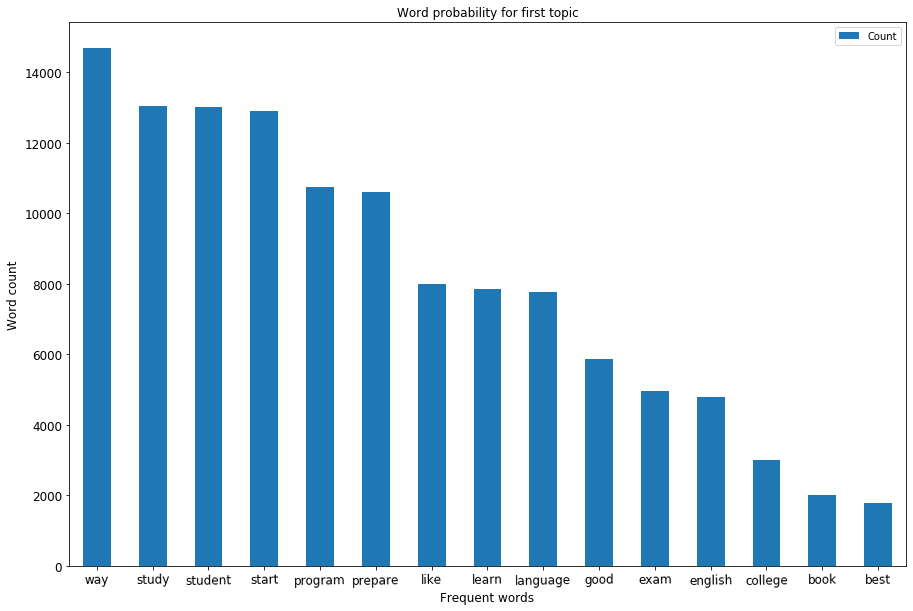

In [45]:
word_list = []
probability_list = []

for index in first_topic.argsort()[-15:]:
    frequent_word = count_vectorizer.get_feature_names()[index]
    print(frequent_word, sep=" ")
    word_list.append(frequent_word)
    probability_list.append(index)
    
show_chart(word_list, probability_list, "Word probability for first topic")

Top words for topic 0 are : 
['war']['card']['light']['good']['high']['major']['college']['travel']['possible']['time']['laptop']['school']['love']['world']['difference']

Top words for topic 1 are : 
['big']['person']['2017']['engineer']['company']['career']['men']['good']['exam']['student']['prepare']['woman']['sex']['job']['engineering']

Top words for topic 2 are : 
['earn']['read']['song']['improve']['watch']['place']['good']['whats']['online']['money']['movie']['book']['make']['way']['best']

Top words for topic 3 are : 
['company']['deal']['mean']['does']['whats']['history']['die']['right']['good']['human']['important']['make']['happen']['thing']['life']

Top words for topic 4 are : 
['food']['sleep']['rid']['body']['car']['cause']['month']['effect']['water']['eat']['use']['english']['weight']['lose']['day']

Top words for topic 5 are : 
['account']['bank']['rs']['black']['rupee']['government']['ban']['money']['1000']['500']['number']['new']['note']['indian']['india']

Top words

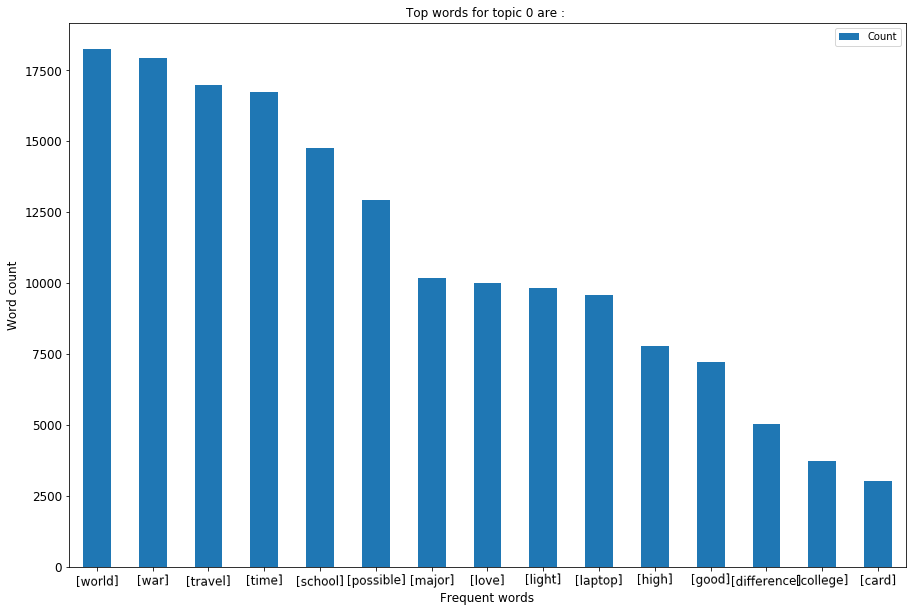

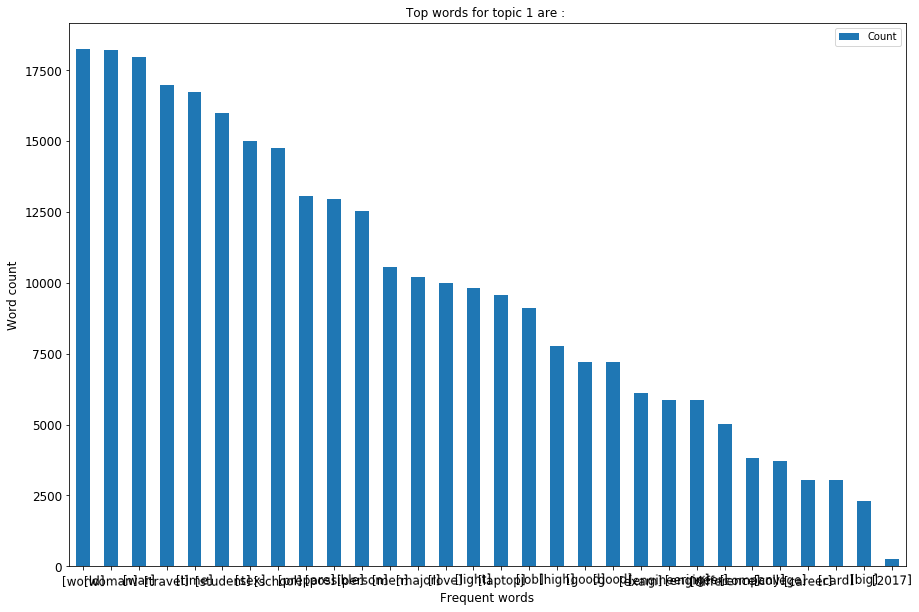

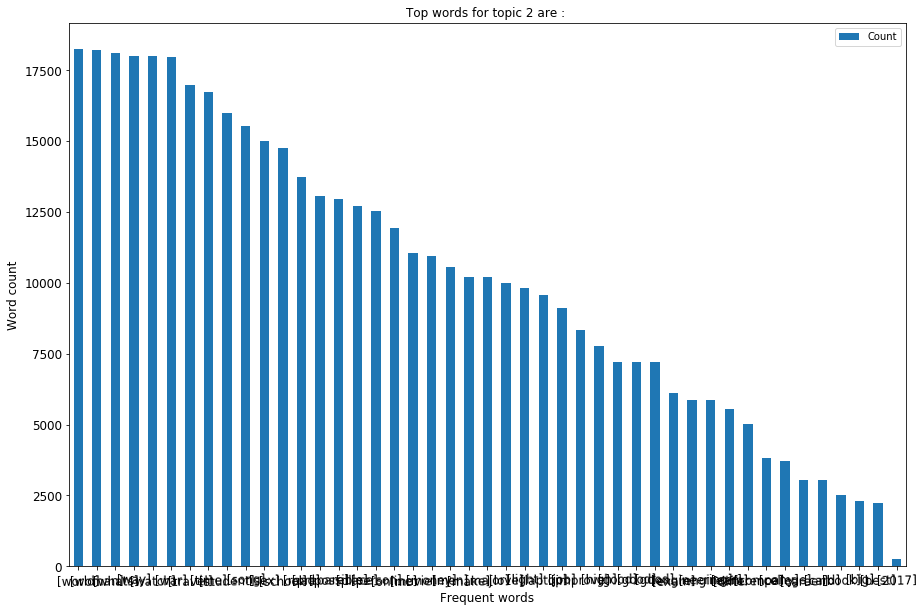

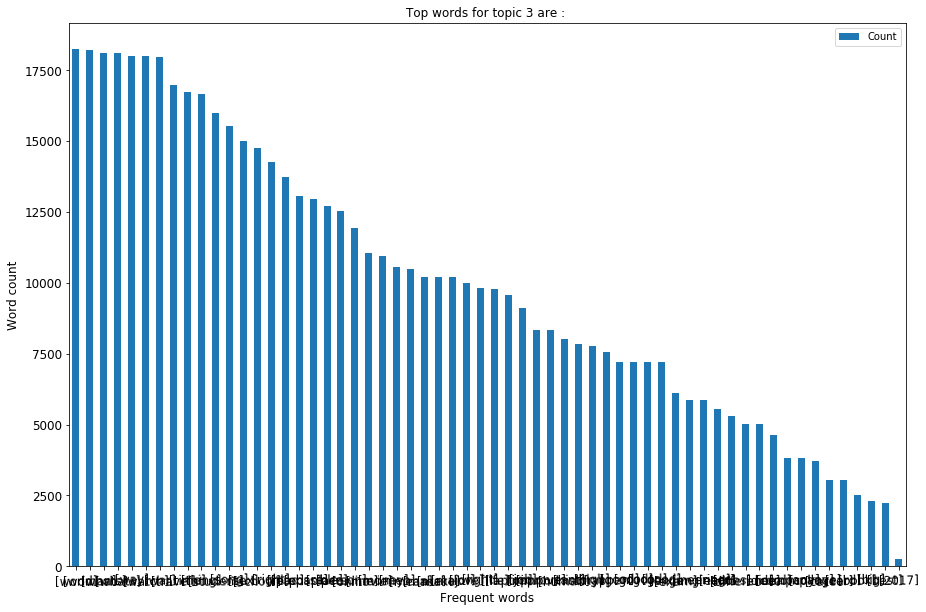

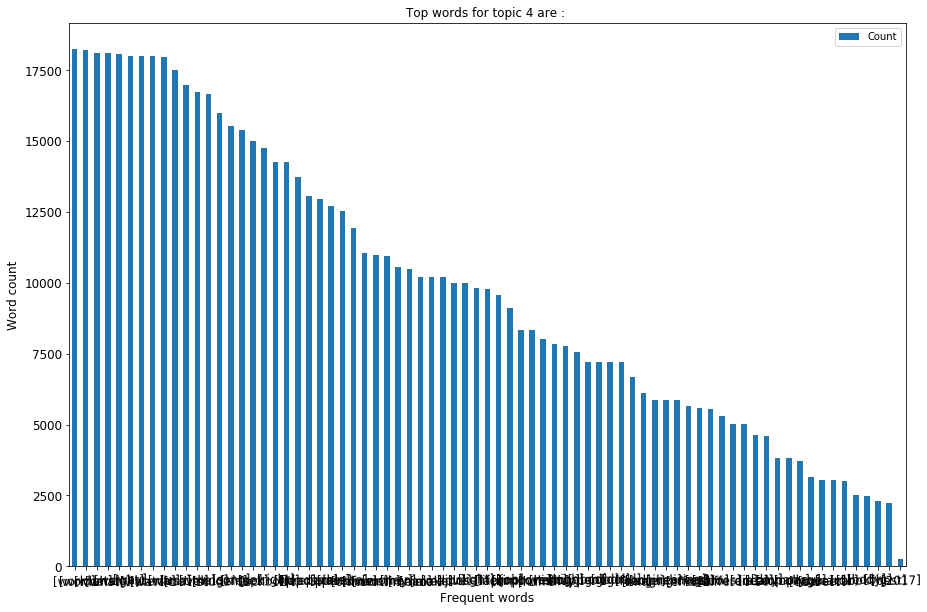

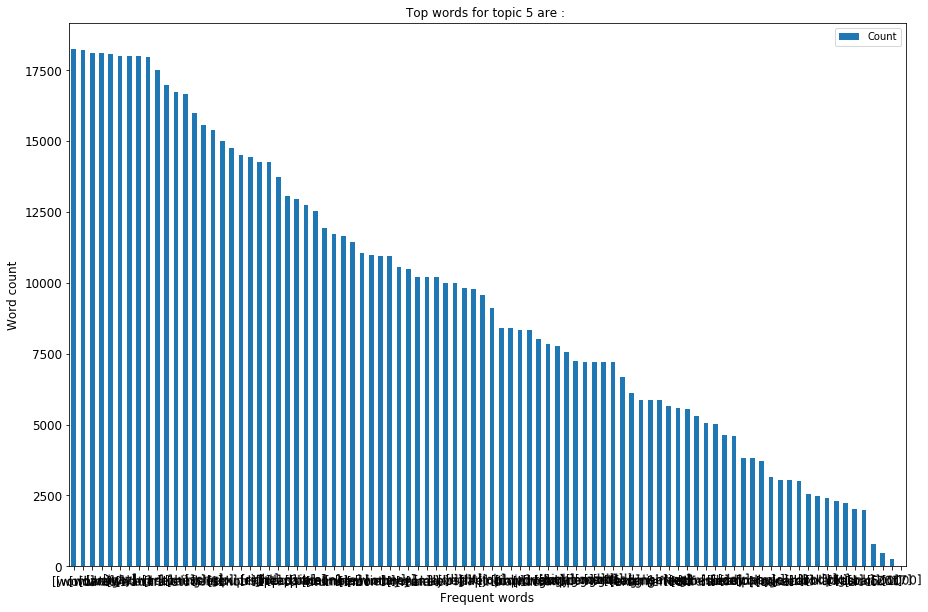

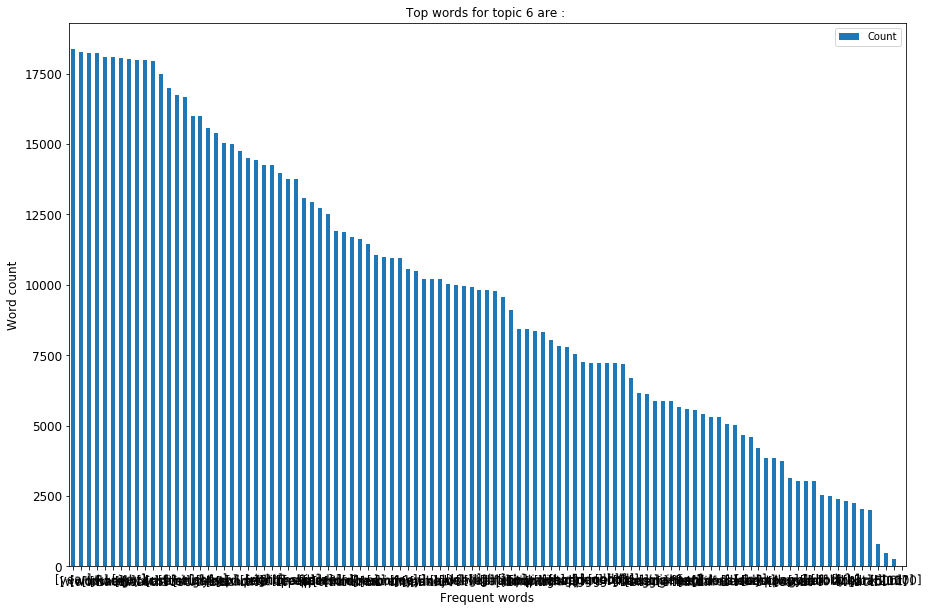

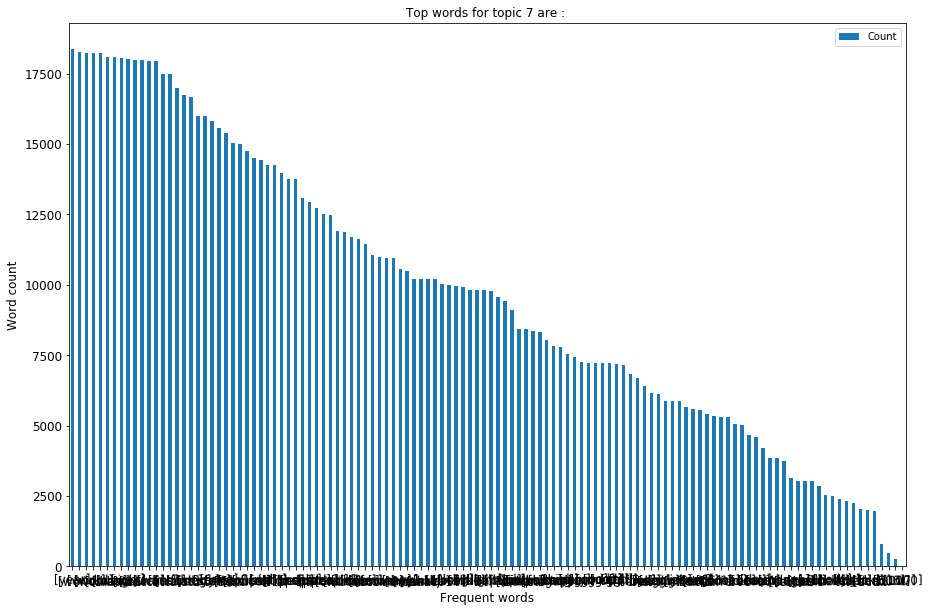

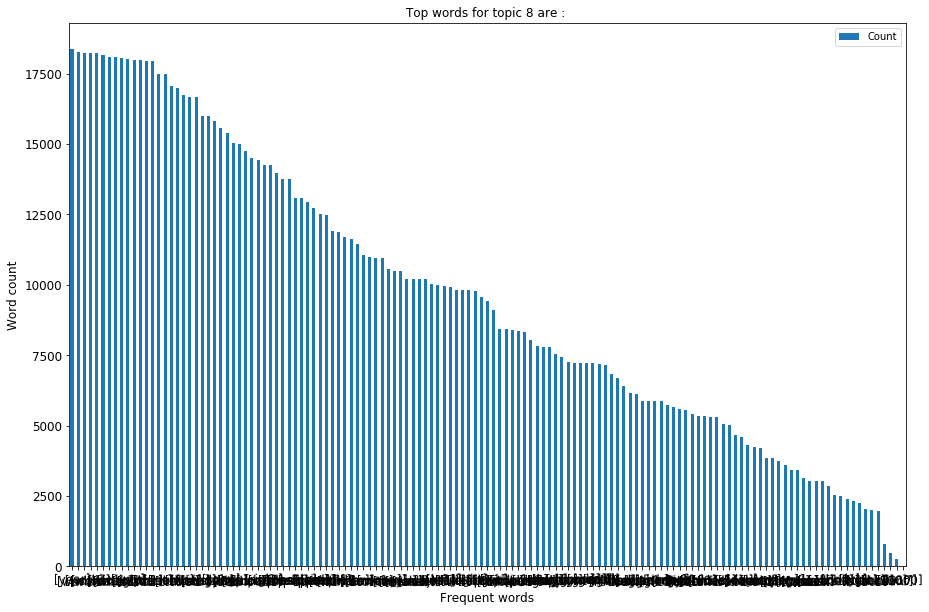

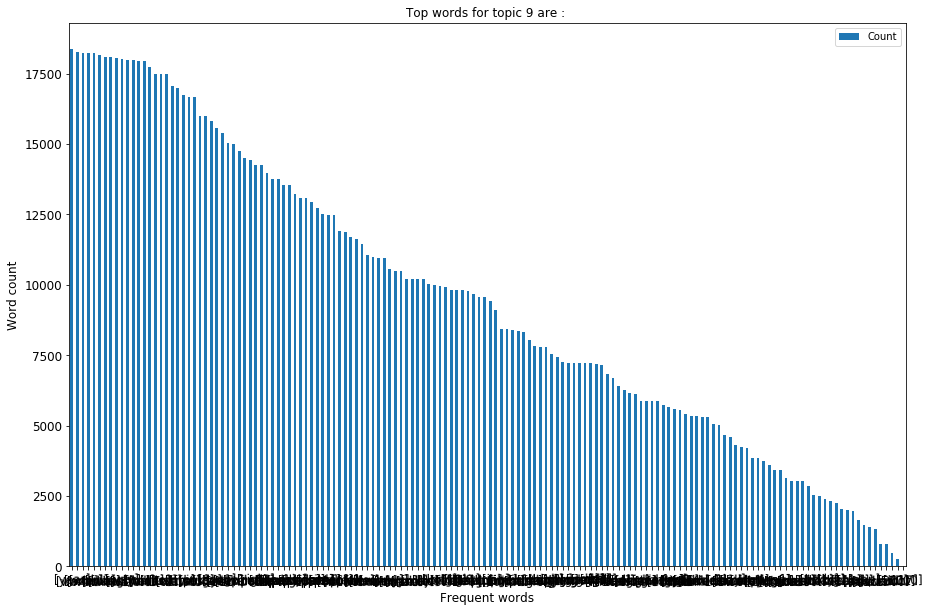

In [39]:
word_list = []
probability_list = []

top_number = 15
count = 0
for probability_number in lda.components_:
    text_message = f"Top words for topic {count} are : "
    print(text_message)    
    for number in probability_number.argsort()[-top_number:]:
        print([count_vectorizer.get_feature_names()[number]], end= "")
        word_list.append([count_vectorizer.get_feature_names()[number]])
        probability_list.append(number)
    show_chart(word_list, probability_list, text_message)
    print("\n")  
    count += 1

In [40]:
top_number = 20
count = 0
for probability_number in lda.components_:
    print(f"Top words for topic {count} are : ")    
    for number in probability_number.argsort()[-top_number:]:
        print([count_vectorizer.get_feature_names()[number]], end= "")
    print("\n")
    count += 1

Top words for topic 0 are : 
['example']['new']['whats']['game']['speed']['war']['card']['light']['good']['high']['major']['college']['travel']['possible']['time']['laptop']['school']['love']['world']['difference']

Top words for topic 1 are : 
['computer']['start']['year']['software']['mark']['big']['person']['2017']['engineer']['company']['career']['men']['good']['exam']['student']['prepare']['woman']['sex']['job']['engineering']

Top words for topic 2 are : 
['write']['visit']['website']['free']['buy']['earn']['read']['song']['improve']['watch']['place']['good']['whats']['online']['money']['movie']['book']['make']['way']['best']

Top words for topic 3 are : 
['person']['fact']['earth']['purpose']['change']['company']['deal']['mean']['does']['whats']['history']['die']['right']['good']['human']['important']['make']['happen']['thing']['life']

Top words for topic 4 are : 
['gain']['fat']['period']['improve']['speak']['food']['sleep']['rid']['body']['car']['cause']['month']['effect']['w

In [41]:
textfile_topics = lda.transform(doc_term_matrix)

In [42]:
textfile_topics[0]

array([0.0125    , 0.01250179, 0.31028318, 0.01250629, 0.01250017,
       0.46130892, 0.14089473, 0.01250173, 0.01250072, 0.01250246])

In [43]:
textfile_topics.shape

(200000, 10)

In [44]:
textfile_topics[0].round(2)

array([0.01, 0.01, 0.31, 0.01, 0.01, 0.46, 0.14, 0.01, 0.01, 0.01])

In [45]:
textfile_topics[0].argmax()

5

In [46]:
examined_topic = lda.components_[9]

In [47]:
for index in examined_topic.argsort()[-50:]:
    print(count_vectorizer.get_feature_names()[index], end=" ")

development play mobile add job developer gift iphone web python post card easily recover search user advantage java file instagram know hack youtube gmail start internet programming delete time believe home good email phone password android app video account facebook program language answer google ask use question learn quora people 

In [48]:
print(df["question"][0])

What is the step by step guide to invest in share market in india?


In [49]:
topic_list = []
# Textfile_topics is a list of arrays containing 
# all index positions of words for each textfile
for popular_index_pos in textfile_topics:
    # Get the max index position in each array
    # and add to the topic_list list
    topic_list.append(popular_index_pos.argmax())

# Add a new column to the dataframe
df["Topic number"] = topic_list

In [61]:
df

,question,text_lower,text_punct,text_stop,text_token,text_lemma,Topic number
0,What is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,What step step guide invest share market india,"[what, step, step, guide, invest, share, marke...",What step step guide invest share market india,9
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,what is the story of kohinoor (koh-i-noor) dia...,What is the story of Kohinoor KohiNoor Diamond,What story Kohinoor KohiNoor Diamond,"[what, story, kohinoor, kohinoor, diamond]",What story Kohinoor KohiNoor Diamond,5
2,How can I increase the speed of my internet co...,how can i increase the speed of my internet co...,How can I increase the speed of my internet co...,How I increase speed internet connection using...,"[how, i, increase, speed, internet, connection...",How I increase speed internet connection use VPN,3
3,Why am I mentally very lonely? How can I solve...,why am i mentally very lonely? how can i solve...,Why am I mentally very lonely How can I solve it,Why I mentally lonely How I solve,"[why, i, mentally, lonely, how, i, solve]",Why I mentally lonely How I solve,8
4,"Which one dissolve in water quikly sugar, salt...","which one dissolve in water quikly sugar, salt...",Which one dissolve in water quikly sugar salt ...,Which one dissolve water quikly sugar salt met...,"[which, one, dissolve, water, quikly, sugar, s...",Which one dissolve water quikly sugar salt met...,5
...,...,...,...,...,...,...,...
199995,Why was the Battle of Vimy Ridge so important?,why was the battle of vimy ridge so important?,Why was the Battle of Vimy Ridge so important,Why Battle Vimy Ridge important,"[why, battle, vimy, ridge, important]",Why Battle Vimy Ridge important,6
199996,Which of these TV shows should I watch next?,which of these tv shows should i watch next?,Which of these TV shows should I watch next,Which TV shows I watch next,"[which, tv, shows, i, watch, next]",Which TV show I watch next,7
199997,Should I change my name?,should i change my name?,Should I change my name,Should I change name,"[should, i, change, name]",Should I change name,9
199998,Should I buy the new MacBook 2016 or one from ...,should i buy the new macbook 2016 or one from ...,Should I buy the new MacBook 2016 or one from ...,Should I buy new MacBook 2016 one 2015,"[should, i, buy, new, macbook, 2016, one, 2015]",Should I buy new MacBook 2016 one 2015,7


In [53]:
topic_list = {0: "Humanities,feelings", 
              1: "education", 
              2: "entertainment", 
              3: "life,feelings", 
              4: "Fitness, health", 
              5: "economy,nation", 
              6: "human life", 
              7: "Relationships", 
              8: "Government,judiciary", 
              9: "technology" 
              }

topic_no_to_topic = df["Topic number"].map(topic_list)

In [54]:
df["Topic desc"] = topic_no_to_topic

In [55]:
df

,question,text_low_case,text_punct,text_stop,text_token,text_lemma,Topic number,Topic desc
0,What is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,What step step guide invest share market india,"[what, step, step, guide, invest, share, marke...",What step step guide invest share market india,5,"economy,nation"
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,what is the story of kohinoor (koh-i-noor) dia...,What is the story of Kohinoor KohiNoor Diamond,What story Kohinoor KohiNoor Diamond,"[what, story, kohinoor, kohinoor, diamond]",What story Kohinoor KohiNoor Diamond,5,"economy,nation"
2,How can I increase the speed of my internet co...,how can i increase the speed of my internet co...,How can I increase the speed of my internet co...,How I increase speed internet connection using...,"[how, i, increase, speed, internet, connection...",How I increase speed internet connection use VPN,9,technology
3,Why am I mentally very lonely? How can I solve...,why am i mentally very lonely? how can i solve...,Why am I mentally very lonely How can I solve it,Why I mentally lonely How I solve,"[why, i, mentally, lonely, how, i, solve]",Why I mentally lonely How I solve,7,Relationships
4,"Which one dissolve in water quikly sugar, salt...","which one dissolve in water quikly sugar, salt...",Which one dissolve in water quikly sugar salt ...,Which one dissolve water quikly sugar salt met...,"[which, one, dissolve, water, quikly, sugar, s...",Which one dissolve water quikly sugar salt met...,4,"Fitness, health"
...,...,...,...,...,...,...,...,...
199995,Why was the Battle of Vimy Ridge so important?,why was the battle of vimy ridge so important?,Why was the Battle of Vimy Ridge so important,Why Battle Vimy Ridge important,"[why, battle, vimy, ridge, important]",Why Battle Vimy Ridge important,3,"life,feelings"
199996,Which of these TV shows should I watch next?,which of these tv shows should i watch next?,Which of these TV shows should I watch next,Which TV shows I watch next,"[which, tv, shows, i, watch, next]",Which TV show I watch next,2,entertainment
199997,Should I change my name?,should i change my name?,Should I change my name,Should I change name,"[should, i, change, name]",Should I change name,3,"life,feelings"
199998,Should I buy the new MacBook 2016 or one from ...,should i buy the new macbook 2016 or one from ...,Should I buy the new MacBook 2016 or one from ...,Should I buy new MacBook 2016 one 2015,"[should, i, buy, new, macbook, 2016, one, 2015]",Should I buy new MacBook 2016 one 2015,0,"Humanities,feelings"


In [56]:
df.to_csv(r'C:/AI2/quora_supervised_LDA.csv', index = False)
#succesfully preproccesed our dataset and stored with new name'quora_supervised_lda'
